# CS 559-B Homework 3

## Student Information:
- Full name: Thanapoom Phatthanaphan
- CWID: 20011296

**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd

### Problem 1

In [2]:
# Given data points
X = np.array([
    [5.9, 3.2],
    [4.6, 2.9],
    [6.2, 2.8],
    [4.7, 3.2],
    [5.5, 4.2],
    [5.0, 3.0],
    [4.9, 3.1],
    [6.7, 3.1],
    [5.1, 3.8],
    [6.0, 3.0]
])

# Initial cluster centers
mean_1 = np.array([6.2, 3.2])
mean_2 = np.array([6.6, 3.7])
mean_3 = np.array([6.5, 3.0])

# Perform k-means clustering for one iteration
def kmeans_iteration(X, mean_1, mean_2, mean_3):

    # Assign each data point to the nearest cluster by calculating the Euclidean distances
    distances = np.column_stack([
        np.linalg.norm(X - mean_1, axis=1),
        np.linalg.norm(X - mean_2, axis=1),
        np.linalg.norm(X - mean_3, axis=1)
    ])
    print(distances)
    # Find the minimum distance of each point to each cluster
    labels = np.argmin(distances, axis=1)

    # Update cluster centers
    mean_1 = np.mean(X[labels == 0], axis=0)
    mean_2 = np.mean(X[labels == 1], axis=0)
    mean_3 = np.mean(X[labels == 2], axis=0)

    return mean_1, mean_2, mean_3

**Problem 1.1** : [10pt] What is the center of the first cluster (red) after one iteration? (Answer in the format of [x1,x2], round results to three decimal places, same as part (2) and (3))

In [3]:
# The first iteration of k-means clustering
mean_1_after_one_iteration, mean_2_after_one_iteration, mean_3_after_one_iteration = kmeans_iteration(X, mean_1, mean_2, mean_3)

# The result of the center of the first cluster (red) after one iteration with three decimal places
print(f"The center of the first cluster (red) after one iteration: {np.round(mean_1_after_one_iteration, 3)}")

[[0.3        0.86023253 0.63245553]
 [1.62788206 2.15406592 1.90262976]
 [0.4        0.98488578 0.36055513]
 [1.5        1.96468827 1.81107703]
 [1.22065556 1.2083046  1.56204994]
 [1.21655251 1.74642492 1.5       ]
 [1.30384048 1.80277564 1.60312195]
 [0.50990195 0.60827625 0.2236068 ]
 [1.25299641 1.50332964 1.61245155]
 [0.28284271 0.92195445 0.5       ]]
The center of the first cluster (red) after one iteration: [5.171 3.171]


**Problem 1.2** : [5pt] What’s the center of the second cluster (green) after two iteration?

In [4]:
# The second iteration of k-means clustering
mean_1_after_two_iteration, mean_2_after_two_iteration, mean_3_after_two_iteration = kmeans_iteration(X, mean_1_after_one_iteration, mean_2_after_one_iteration, mean_3_after_one_iteration)

# The result of the center of the second cluster (green) after two iteration with three decimal places
print(f"The center of the second cluster (green) after two iteration: {np.round(mean_2_after_two_iteration, 3)}")

[[0.72913144 1.07703296 0.6041523 ]
 [0.63261685 1.58113883 1.85067555]
 [1.09358053 1.56524758 0.29154759]
 [0.47229358 1.28062485 1.76776695]
 [1.079777   0.         1.57003185]
 [0.24243661 1.3        1.45086181]
 [0.28066975 1.25299641 1.55724115]
 [1.53023941 1.62788206 0.29154759]
 [0.63261685 0.56568542 1.59530561]
 [0.84611959 1.3        0.45276926]]
The center of the second cluster (green) after two iteration: [5.3 4. ]


**Problem 1.3** : [5pt] What’s the center of the third cluster (blue) when the clustering converges?

In [5]:
# Iterate k-means clustering until convergence
curr_iteration_count = 2
while True:
    curr_mean_1, curr_mean_2, curr_mean_3 = mean_1_after_two_iteration, mean_2_after_two_iteration, mean_3_after_two_iteration
    new_mean_1, new_mean_2, new_mean_3 = kmeans_iteration(X, curr_mean_1, curr_mean_2, curr_mean_3)
    if np.mean(new_mean_1) == np.mean(curr_mean_1) and np.mean(new_mean_2) == np.mean(curr_mean_2) and np.mean(new_mean_3) == np.mean(curr_mean_3):
        break
    curr_iteration_count += 1

# The result of the center of the third cluster (blue) when the clustering converges with three decimal places
print(f"The center of the second cluster (green) after two iteration: {np.round(new_mean_3, 3)}")

[[1.11018017 1.         0.3473111 ]
 [0.25       1.30384048 1.60487538]
 [1.42214627 1.5        0.225     ]
 [0.18027756 1.         1.51017383]
 [1.3462912  0.28284271 1.36770794]
 [0.20615528 1.04403065 1.20026039]
 [0.1118034  0.98488578 1.30216166]
 [1.90065778 1.6643317  0.50559371]
 [0.80777472 0.28284271 1.34559466]
 [1.20104121 1.22065556 0.20155644]]
The center of the second cluster (green) after two iteration: [6.2   3.025]


**Problem 1.4** : [5pt] How many iterations are required for the clusters to converge?

In [6]:
print("The number of iterations for the clusters to converge:", curr_iteration_count, "iterations")

The number of iterations for the clusters to converge: 2 iterations


### Problem 5

**Importing the necessary libraries**

In [7]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

**Importing the Iris plant dataset**

In [8]:
!pip install ucimlrepo

In [9]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

In [10]:
# metadata
iris.metadata

{'uci_id': 53,
 'name': 'Iris',
 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris',
 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv',
 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n',
 'area': 'Biology',
 'tasks': ['Classification'],
 'characteristics': ['Tabular'],
 'num_instances': 150,
 'num_features': 4,
 'feature_types': ['Real'],
 'demographics': [],
 'target_col': ['class'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 1936,
 'last_updated': 'Tue Sep 12 2023',
 'dataset_doi': '10.24432/C56C76',
 'creators': ['R. A. Fisher'],
 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica',
  'authors': 'A. Unwin, K. Kleinman',
  'published_in': 'Significance, 2021',
  'year': 2021,
  'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e',
  '

In [11]:
# variable information
iris.variables

,name,role,type,demographic,description,units,missing_values
0,sepal length,Feature,Continuous,None,None,cm,no
1,sepal width,Feature,Continuous,None,None,cm,no
2,petal length,Feature,Continuous,None,None,cm,no
3,petal width,Feature,Continuous,None,None,cm,no
4,class,Target,Categorical,None,"class of iris plant: Iris Setosa, Iris Versico...",None,no


In [12]:
X # features

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y # target

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


**Problem 5.1** : [20pt] Properly split the data to training and testing set, and report the training, testing accuracy. You can use sigmoid activation function and select any reasonable size of hidden units. Note that for this part, you need to implement the forward/backward function yourself without using the deep learning package. However, you can use the deep learning package, e.g., tensorflow, pytorch, matconvnet etc, to compare with your own results.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


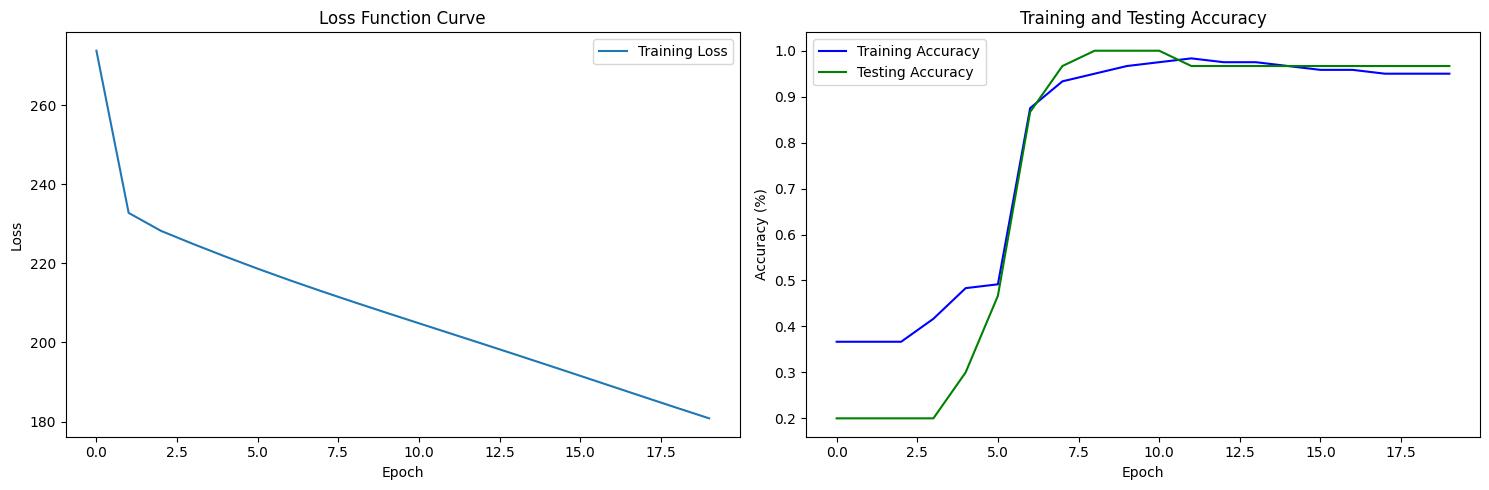


After 20 epochs
Training accuracy: 95.0 %
Testing accuracy: 96.7 %


In [14]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)

# Split the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=100)

# Define neural network parameters
input_size = X_train.shape[1]
hidden_size = 32
output_size = y_train.shape[1]
learning_rate = 0.01
epochs = 20

# Initialize weights and biases
np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
biases_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
biases_output = np.zeros((1, output_size))

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Lists to store training loss, training and testing accuracies
training_loss_history = []
training_accuracy_history = []
testing_accuracy_history = []

# Training the neural network
for epoch in range(epochs):

    # Forward pass
    hidden_input = np.dot(X_train, weights_input_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output) + biases_output
    final_output = sigmoid(final_input)

    # Compute loss
    loss = -np.sum(y_train * np.log(final_output) + (1 - y_train) * np.log(1 - final_output))

    # Backward pass
    d_loss = final_output - y_train
    d_final_input = d_loss * sigmoid_derivative(final_output)
    d_hidden_output = np.dot(d_final_input, weights_hidden_output.T)
    d_hidden_input = d_hidden_output * sigmoid_derivative(hidden_output)

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, d_final_input)
    biases_output -= learning_rate * np.sum(d_final_input, axis=0, keepdims=True)
    weights_input_hidden -= learning_rate * np.dot(X_train.T, d_hidden_input)
    biases_hidden -= learning_rate * np.sum(d_hidden_input, axis=0, keepdims=True)

    # Store training loss
    training_loss_history.append(loss)

    # Calculate training accuracy
    hidden_layer_train = sigmoid(np.dot(X_train, weights_input_hidden) + biases_hidden)
    output_layer_train = sigmoid(np.dot(hidden_layer_train, weights_hidden_output) + biases_output)

    # Convert probabilities to class labels
    predicted_labels_train = np.argmax(output_layer_train, axis=1)
    accuracy_train = np.mean(predicted_labels_train == np.argmax(y_train, axis=1))
    training_accuracy_history.append(accuracy_train)

    # Testing the neural network
    hidden_layer_test = sigmoid(np.dot(X_test, weights_input_hidden) + biases_hidden)
    output_layer_test = sigmoid(np.dot(hidden_layer_test, weights_hidden_output) + biases_output)

    # Convert probabilities to class labels
    predicted_labels_test = np.argmax(output_layer_test, axis=1)
    accuracy_test = np.mean(predicted_labels_test == np.argmax(y_test, axis=1))
    testing_accuracy_history.append(accuracy_test)

# Plot the loss function curve and training/testing accuracy
plt.figure(figsize=(15, 5))

# Loss Function Curve
plt.subplot(1, 2, 1)
plt.plot(training_loss_history, label='Training Loss')
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and Testing Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy_history, label='Training Accuracy', color='blue')
plt.plot(testing_accuracy_history, label='Testing Accuracy', color='green')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

print("\nAfter 20 epochs")
print("Training accuracy:", round(accuracy_train * 100, 1), '%')
print("Testing accuracy:", round(accuracy_test * 100, 1), '%')

**Problem 5.2** : [10pt] Try different design of the neural network, compare with part (1), and report findings. This is an open-ended question, you can change the previous model in several ways, e.g., (1) change the activation function to be tanh, ReLU etc, or (2) try to build more complex neural network by introducing more layers, or many other options. Note that for this part, you are allowed to use deep learning packages.

Epoch 1/2
15/15 [==============================] - 2s 4ms/step - loss: 1.2057 - accuracy: 0.3083
Epoch 2/2
4/4 [==============================] - 0s 4ms/step
Epoch 1/2
15/15 [==============================] - 0s 3ms/step - loss: 0.9972 - accuracy: 0.6417
Epoch 2/2
4/4 [==============================] - 0s 3ms/step
Epoch 1/2
15/15 [==============================] - 0s 3ms/step - loss: 0.8266 - accuracy: 0.6917
Epoch 2/2
4/4 [==============================] - 0s 3ms/step
Epoch 1/2
15/15 [==============================] - 0s 3ms/step - loss: 0.6725 - accuracy: 0.6917
Epoch 2/2
4/4 [==============================] - 0s 3ms/step
Epoch 1/2
15/15 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.6917
Epoch 2/2
4/4 [==============================] - 0s 3ms/step
Epoch 1/2
15/15 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.8417
Epoch 2/2
4/4 [==============================] - 0s 2ms/step
Epoch 1/2
15/15 [==============================] - 0

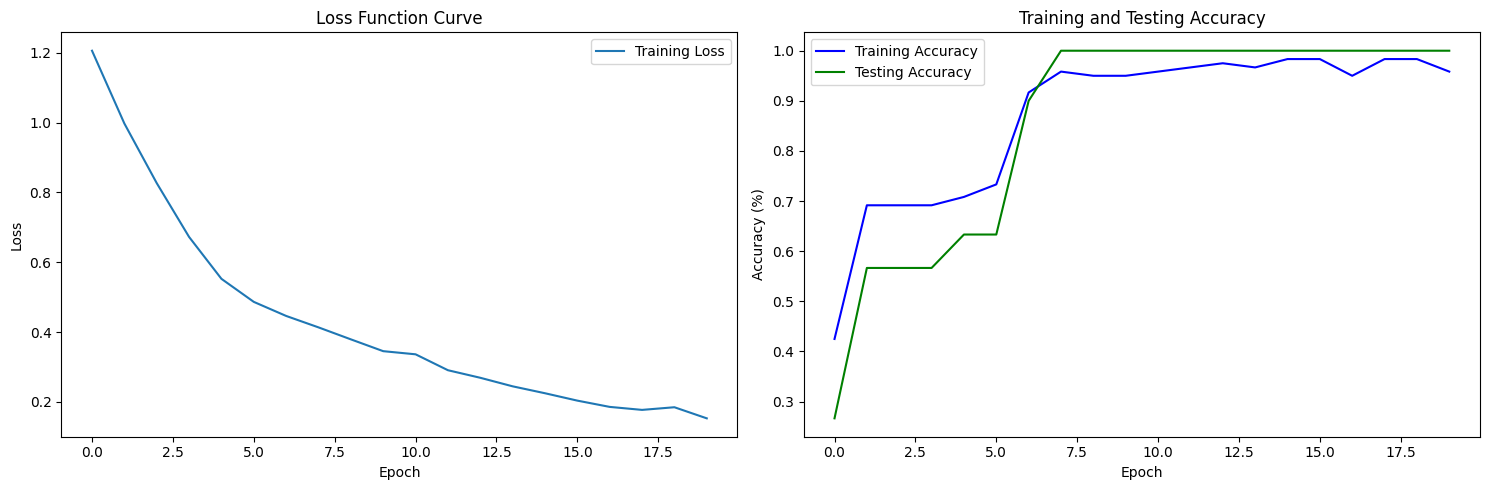


After 20 epochs
Training accuracy: 95.8 %
Testing accuracy: 100.0 %


In [15]:
# Define neural network model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='tanh', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Lists to store training loss, training, and testing accuracies
training_loss_history = []
training_accuracy_history = []
testing_accuracy_history = []

# Train the model
for epoch in range(20):

    history = model.fit(X_train, y_train, epochs=2, batch_size=8, verbose=1)

    # Store training loss
    training_loss_history.append(history.history['loss'][0])

    # Calculate training accuracy
    predicted_labels_train = np.argmax(model.predict(X_train), axis=1)
    accuracy_train = np.mean(predicted_labels_train == np.argmax(y_train, axis=1))
    training_accuracy_history.append(accuracy_train)

    # Evaluate the model on the testing set
    _, accuracy_test = model.evaluate(X_test, y_test, verbose=0)
    testing_accuracy_history.append(accuracy_test)

# Plot the loss function curve and training/testing accuracy
plt.figure(figsize=(15, 5))

# Loss Function Curve
plt.subplot(1, 2, 1)
plt.plot(training_loss_history, label='Training Loss')
plt.title('Loss Function Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and Testing Accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy_history, label='Training Accuracy', color='blue')
plt.plot(testing_accuracy_history, label='Testing Accuracy', color='green')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

print("\nAfter 20 epochs")
print("Training accuracy:", round(accuracy_train * 100, 1), '%')
print("Testing accuracy:", round(accuracy_test * 100, 1), '%')

**Conclusion**

In part 2 (Problem 5.2), I used TensorFlow to build the neural network containing 2 hidden layers with 32 and 16 hidden units respectively and using tanh as the activation function instead of sigmoid. I also used optimizer "Adam" for parameters tuning. For training step, I trained and updated the parameters in each batch not the entire training dataset.

The result displays as shown in the above graph. The training loss is better by gradually decreasing, and the training and testing accuracies increase faster than the previous method and the final accuracies are a little bit higher.